### Unsupervised learning

In unsupervised learning, we don't predict anything. Instead we find patterns in the data
- Clustering: This is one of the main unsupervised learning technique. It is used when we are trying the explore a dataset, and understand the connection between various rows and columns. 
    - K-Means Clustering:
    - Heirarchical Clustering:

    Clustering is a powerful way to explore data and find patterns. Unsupervised learning is very commonly used with large datasets where it isn't obvious how to start with supervised machine learning. In general, it's a good idea to try unsupervised learning to explore a dataset before trying to use supervised learning machine learning models.

- Dimensional Reduction: 
    - Principal Component Analysis (PCA): 
    - Singular Value Decomposition (SVD):
- Deep Neural Network based:
    - Auto Encoders:

- In unsupervised learning, there is no output. Its just to analyse the input and find some patterns
- 

In [1]:
import pandas as pd
import numpy as np

In [6]:
votes = pd.read_csv('114_congress.csv')

In [7]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [8]:
votes.shape

(100, 18)

In [9]:
votes['party'].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [13]:
v_mean = votes.mean()

In [19]:
v_mean[v_mean > 0.5]

00004    0.575
00005    0.535
00006    0.945
00007    0.545
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00039    0.510
dtype: float64

#### Length of the axis=1

In [33]:
votes.columns

Index(['name', 'party', 'state', '00001', '00004', '00005', '00006', '00007',
       '00008', '00009', '00010', '00020', '00026', '00032', '00038', '00039',
       '00044', '00047'],
      dtype='object')

In [34]:
col_len = len(votes.axes[1])

In [47]:
votes.iloc[0,3:]

00001    0
00004    1
00005    1
00006    1
00007    1
00008    0
00009    0
00010    1
00020    1
00026    1
00032    0
00038    0
00039    0
00044    0
00047    0
Name: 0, dtype: object

In [43]:
from sklearn.metrics.pairwise import euclidean_distances

In [50]:
euclidean_distances(votes.iloc[0,3:].values.reshape(1,-1),votes.iloc[1,3:].values.reshape(1,-1))

array([[1.73205081]])

In [157]:
votes.iloc[0,3:].values

array([0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1, 37.479030847005234], dtype=object)

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans_model = KMeans(2,random_state=1)

In [67]:
votes.iloc[:,3:].to_numpy()

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 1.]])

In [62]:
votes.iloc[0:,3:].as_matrix()

c:\pyvirtualenv\ml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 1.]])

In [109]:
senator_distances = kmeans_model.fit_transform(votes.iloc[:,3:].to_numpy())

In [77]:
#senator_distances
labels = kmeans_model.labels_
len(labels)

100

In [78]:
votes['label'] = labels

In [92]:
#pd.crosstab(votes['party'], votes['label'])
pd.crosstab(votes['party'],votes['label'])

label,0,1
party,,
D,41,3
I,2,0
R,0,54


In [87]:
democratic_outliers = votes[(votes.party == 'D') & (votes.label == 1)]
democratic_outliers

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,label
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1


In [94]:
import matplotlib.pyplot as plt

In [113]:
senator_distances.shape

(100, 2)

In [115]:
senator_distances.reshape(2,100)[0]

array([3.27768815, 1.3134775 , 2.79933257, 2.05339992, 0.33960656,
       3.55985836, 3.56324683, 0.24198446, 1.43833966, 3.13256164,
       0.33960656, 3.55985836, 3.56324683, 0.24198446, 0.33960656,
       3.55985836, 3.56324683, 0.24198446, 0.31287498, 3.4554501 ,
       0.33960656, 3.55985836, 3.42004795, 0.96734144, 0.33960656,
       3.55985836, 3.49487765, 0.53945585, 0.33960656, 3.55985836,
       1.18084816, 3.28296432, 1.23852221, 3.29097042, 3.56324683,
       0.24198446, 3.56324683, 0.24198446, 3.56324683, 0.24198446,
       2.79933257, 2.05339992, 0.58487332, 3.46179073, 3.56324683,
       0.24198446, 3.56324683, 0.24198446, 3.56324683, 0.24198446,
       3.56324683, 0.24198446, 3.70090907, 0.93036231, 3.56324683,
       0.24198446, 1.73847904, 2.99513559, 0.33960656, 3.55985836,
       3.56324683, 0.24198446, 3.56324683, 0.24198446, 0.33960656,
       3.55985836, 3.56324683, 0.24198446, 3.56324683, 0.24198446,
       0.58487332, 3.46179073, 3.42004795, 0.92088553, 0.33960

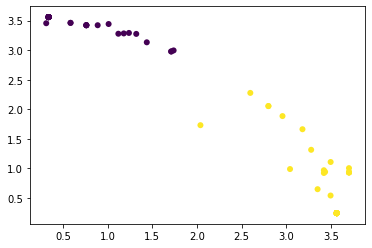

In [121]:
#senator_distances = senator_distances ** 3
#x = [i[0] for i in senator_distances]
#y = [i[1] for i in senator_distances]
x = senator_distances.T[0]
y = senator_distances.T[1]
plt.scatter(x,y,c=labels,linewidths=0)

In [117]:
cubed = senator_distances ** 3
votes['extremist'] = cubed.sum(axis=1)

In [118]:
votes.sort_values('extremist',ascending=False).head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,label,extremist
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,51.699245
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,51.495642
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,51.495642
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,51.495642
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,51.495642
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,45.255745
47,Isakson,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,45.255745
65,Murkowski,R,AK,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,45.255745
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,45.255745
30,Enzi,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,45.255745


In [122]:
nba = pd.read_csv("nba_2013.csv")
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [123]:
nba.shape

(481, 31)

In [124]:
nba.pos.unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [127]:
point_guards = nba[(nba.pos == 'PG')]

In [128]:
point_guards['ppg'] = point_guards['pts']/point_guards['g']

c:\pyvirtualenv\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
point_guards.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,313,53,3,125,147,930,2013-2014,2013,13.098592,2.504000
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,32,7,4,19,30,150,2013-2014,2013,7.500000,1.684211
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,303,26,0,125,129,660,2013-2014,2013,8.354430,2.424000
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,194,60,9,82,161,666,2013-2014,2013,9.250000,2.365854
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,307,54,8,102,85,378,2013-2014,2013,6.872727,3.009804


In [130]:
point_guards['atr'] = point_guards['ast']/point_guards['tov']

c:\pyvirtualenv\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
point_guards.shape

(83, 33)

In [139]:
point_guards = point_guards[point_guards.atr.notna()]

Text(0, 0.5, 'Assist Turnover ratio')

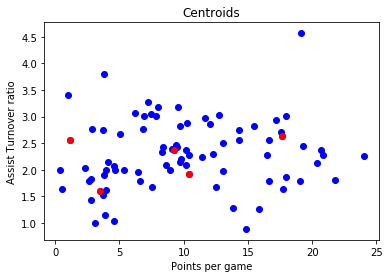

In [149]:
plt.scatter(point_guards.ppg, point_guards.atr,c="blue")
plt.scatter(centroids.ppg, centroids.atr, c="red")
plt.title("Centroids")
plt.xlabel("Points per game")
plt.ylabel("Assist Turnover ratio")

In [142]:
num_clusters = 5
centroid_index = np.random.choice(point_guards.index, num_clusters)

In [143]:
centroid_index

array([ 38, 431, 450, 157, 372], dtype=int64)

In [144]:
centroids = point_guards.loc[centroid_index]

In [145]:
centroids

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,194,60,9,82,161,666,2013-2014,2013,9.250000,2.365854
431,Jamaal Tinsley,PG,35,UTA,8,5,110,4,20,0.200,...,23,2,0,9,10,9,2013-2014,2013,1.125000,2.555556
450,Kemba Walker,PG,23,CHA,73,73,2614,449,1143,0.393,...,447,86,32,169,128,1289,2013-2014,2013,17.657534,2.644970
157,Diante Garrett,PG,25,UTA,71,0,1048,101,265,0.381,...,120,41,5,75,75,248,2013-2014,2013,3.492958,1.600000
372,Nate Robinson,PG,29,DEN,44,1,866,164,383,0.428,...,112,36,4,58,92,457,2013-2014,2013,10.386364,1.931034


In [183]:
euclidean_distances(centroids.iloc[0][['ppg','atr']].values.reshape(1,-1),point_guards.iloc[0][['ppg','atr']].values.reshape(1,-1))

array([[3.85107015]])

In [165]:
centroids.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end', 'ppg', 'atr'],
      dtype='object')

In [181]:
centroids.iloc[0][["season_end",'ppg','atr']].values

array([2013, 9.25, 2.3658536585365852], dtype=object)

In [177]:
centroids.iloc[0,-2:].values

array([9.25, 2.3658536585365852], dtype=object)